# 1. Случайный лес

1.1 Загрузка данных

In [1]:
import pandas as pd

df = pd.read_csv("gender_classification_v7.csv", sep=";")
df.replace('.', '.')
df.info()
y = df['gender']
X = df.drop(['gender'], axis=1)
# X = X.astype(float)
X.info()
print(y)
# df = pd.read_csv("pulsar_data.csv")
# df = pd.read_csv("waterQuality.csv")
# df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
# df = df.dropna(how='any')
# df = df.reset_index(drop=True)
# df['is_safe'] = df['is_safe'].astype(int)
# df.info()
# #y = df['target_class']
# #df['ammonia'] = df['ammonia'].astype(float)
# y = df['is_safe']
# #X = df.drop(['target_class'], axis=1)
# X = df.drop(['is_safe'], axis=1)
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   for

1.2 Обучение случайного леса

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

n_estimators = 2
max_features = 0.5

model = RandomForestClassifier(n_estimators=n_estimators,
                               max_features=max_features)

model.fit(X, y)
pred = model.predict(X)
acc_rf = round(accuracy_score(y, pred), 3)
print(f"Accuracy for Random Forest Classifier: {acc_rf}")
prec_rf = round(precision_score(y, pred), 3)
print(f"Precision for Random Forest Classifier: {prec_rf}")
f1_rf = round(f1_score(y, pred), 3)
print(f"F1 Score for Random Forest Classifier: {f1_rf}")

Accuracy for Random Forest Classifier: 0.988
Precision for Random Forest Classifier: 0.995
F1 Score for Random Forest Classifier: 0.988


# 2. Инициализация переменных

2.1 Многозначная классификация

In [3]:
t = [1]
f = [0]
n = []
b = [0, 1]

2.2 Создание датафрейма

In [4]:
import pandas as pd

df = pd.DataFrame(index=X.index)
df['label_old'] = [n for x in X.index]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label_old  5001 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


# 3. Дерево решений

3.1 Бутстрэпинг

In [5]:
X_bt = X.sample(frac=max_features)
X_bt = X_bt.sample(frac=max_features, axis='columns')
y_bt = y.loc[X_bt.index]
X_bt.shape

(2500, 4)

3.2 Обучение дерева решений

In [6]:
from sklearn.tree import DecisionTreeClassifier

# без ограничения глубины дерево не рисуется
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_bt, y_bt)
pred = model.predict(X_bt)
accuracy_score(y_bt, pred)

0.96

3.3 Визуализация дерева

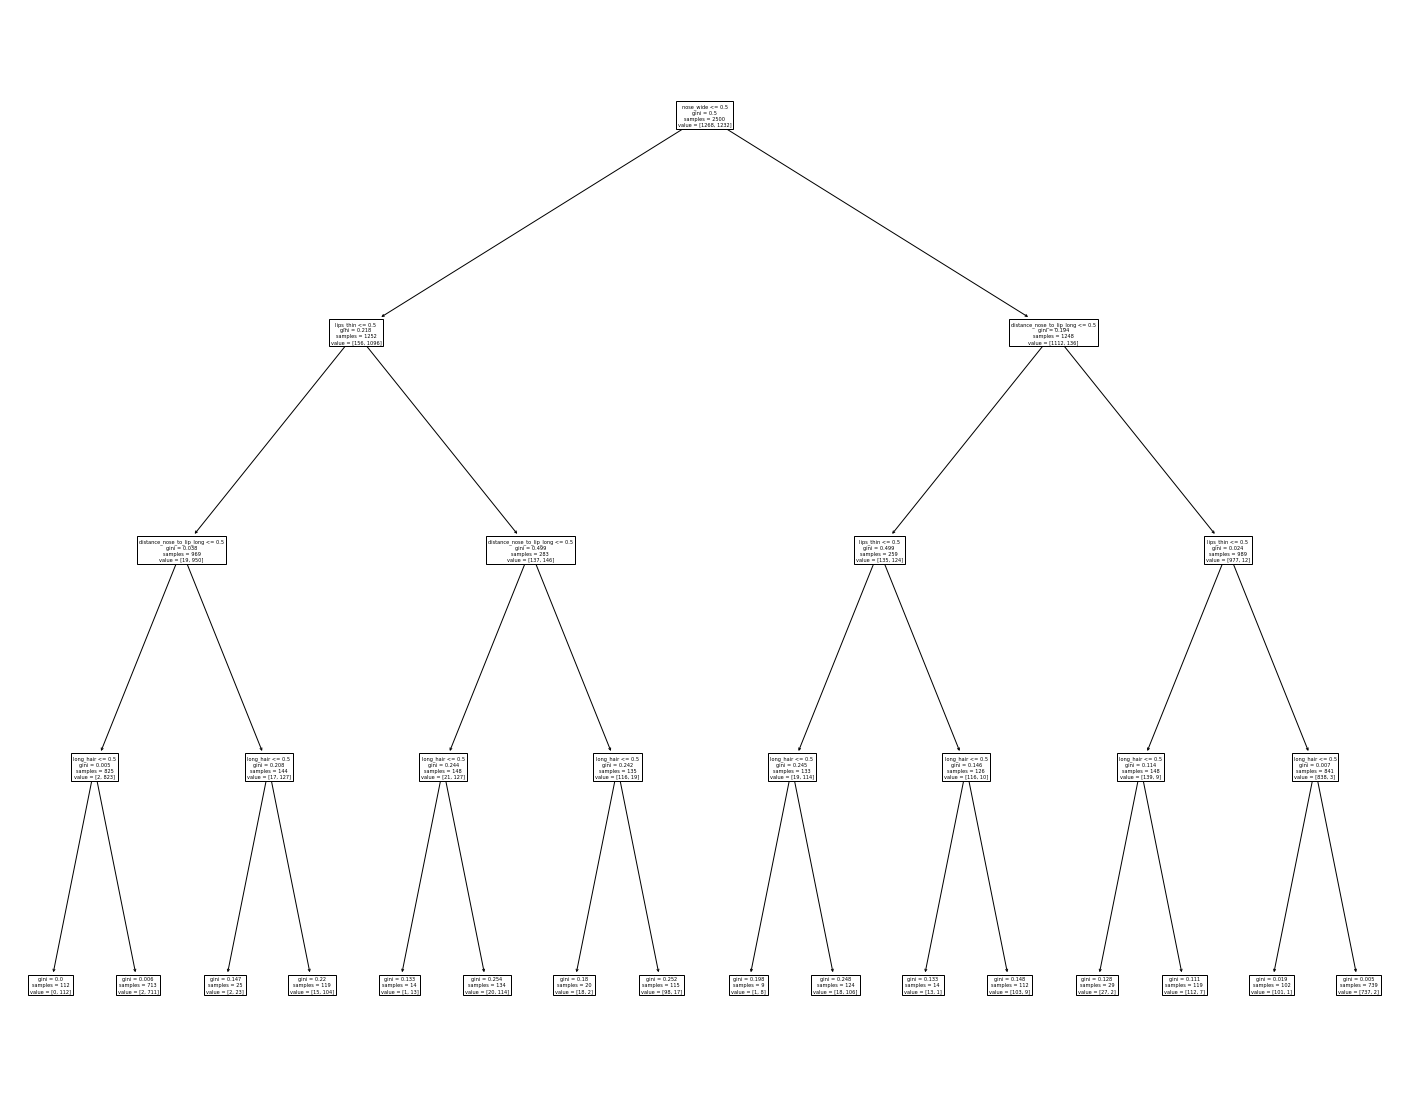

In [7]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(model,
               feature_names = X_bt.columns)
fig.show()

 # 4. Объединение предсказанных лейблов

4.1 Идентификация предсказанных лейблов

In [8]:
index_df = pd.DataFrame(index=X.index)
pred_df = pd.DataFrame(pred, index=X_bt.index, columns=['label_new'])
pred_df = pd.concat([index_df, pred_df], axis=1)
pred_df.head()
# NaN - строки не попали в выборки

,label_new
0,NaN
1,NaN
2,NaN
3,NaN
4,1.0


4.2 Форматирование предсказанных лейблов

In [9]:
pred_df['label_new'] = pred_df['label_new'].apply(lambda x: n if pd.isna(x) else [int(x)])
pred_df.head()
# множества из многозначной логики

,label_new
0,[]
1,[]
2,[]
3,[]
4,[1]


4.3 Соединение с имеющимися лейблами

In [10]:
df = pd.concat([df, pred_df], axis=1)
df.head()

,label_old,label_new
0,[],[]
1,[],[]
2,[],[]
3,[],[]
4,[],[1]


4.4 Агрегация лейблов

In [11]:
df['label_old'] = df[['label_old', 'label_new']].values.tolist()
df = df.drop(columns=['label_new'])
df.to_csv('labels.csv')
df.head()

,label_old
0,"[[], []]"
1,"[[], []]"
2,"[[], []]"
3,"[[], []]"
4,"[[], [1]]"


4.5.1 Четырехзначная конъюнкция

In [12]:
# def conj(labels):
#   a = labels[0]
#   b = labels[1]
#   if a == b:
#     return a
#   elif a == f or b == f:
#     return f
#   elif a == t:
#     return b
#   elif b == t:
#     return a
#   else:
#     return f

# df['label_old'] = df['label_old'].apply(conj)
# df.to_csv('labels.csv')
# df.head()

4.5.2 Четырехзначная дизъюнкция

In [13]:
def disj(labels):
  a = labels[0]
  b = labels[1]

  if a == b:
    return a
  elif a == t or b == t:
    return t
  elif a == f:
    return b
  elif b == f:
    return a
  else:
    return t

df['label_old'] = df['label_old'].apply(disj)
df.to_csv('labels.csv')
df.head()

,label_old
0,[]
1,[]
2,[]
3,[]
4,[1]


4.6 Оценка точности Accuracy

In [14]:
iter = 0

pred = [x[0] if len(x) == 1 else -1 for x in df['label_old'].values]
print(f"Iter. #{iter} Accuracy: {round(accuracy_score(y, pred), 3)}")

Iter. #0 Accuracy: 0.238


4.7 Оценка точности Precision

In [15]:
from sklearn.metrics import precision_score

pred = [x if x == 1 else 0 for x in pred]
print(f"Iter. #{iter} Precision: {round(precision_score(y, pred), 3)}")

Iter. #0 Precision: 0.953


4.8 Оценка F1 Score

In [16]:
pred = [x if x == 1 else 0 for x in pred]
print(f"Iter. #{iter} F1 Score: {round(f1_score(y, pred), 3)}")

Iter. #0 F1 Score: 0.635


#5. Повторение пунктов 3-4

In [17]:
iter += 1

X_bt = X.sample(frac=max_features)
X_bt = X_bt.sample(frac=max_features, axis='columns')
y_bt = y.loc[X_bt.index]
print(X_bt.shape)


from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_bt, y_bt)
pred = model.predict(X_bt)
print(accuracy_score(y_bt, pred))

from sklearn import tree
from matplotlib import pyplot as plt

# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(model,
#                feature_names = X_bt.columns)
# fig.show()

index_df = pd.DataFrame(index=X.index)
pred_df = pd.DataFrame(pred, index=X_bt.index, columns=['label_new'])
pred_df = pd.concat([index_df, pred_df], axis=1)
print(pred_df.head())
# NaN - строки не попали в выборки

pred_df['label_new'] = pred_df['label_new'].apply(lambda x: n if pd.isna(x) else [int(x)])
print(pred_df.head())
# множества из многозначной логики

df = pd.concat([df, pred_df], axis=1)
print(df.head())

df['label_old'] = df[['label_old', 'label_new']].values.tolist()
df = df.drop(columns=['label_new'])
df.to_csv('labels.csv')
print(df.head())

df['label_old'] = df['label_old'].apply(disj)
df.to_csv('labels.csv')
print(df.head())

pred = [x[0] if len(x) == 1 else -1 for x in df['label_old'].values]
print(f"Iter. #{iter} Accuracy: {round(accuracy_score(y, pred), 3)}")

pred = [x if x == 1 else 0 for x in pred]
print(f"Iter. #{iter} Precision: {round(precision_score(y, pred), 3)}")

print(f"Iter. #{iter} F1 Score: {round(f1_score(y, pred), 3)}")

(2500, 4)
0.9644
   label_new
0        NaN
1        1.0
2        1.0
3        0.0
4        NaN
  label_new
0        []
1       [1]
2       [1]
3       [0]
4        []
  label_old label_new
0        []        []
1        []       [1]
2        []       [1]
3        []       [0]
4       [1]        []
   label_old
0   [[], []]
1  [[], [1]]
2  [[], [1]]
3  [[], [0]]
4  [[1], []]
  label_old
0        []
1       [1]
2       [1]
3        []
4       [1]
Iter. #1 Accuracy: 0.359
Iter. #1 Precision: 0.958
Iter. #1 F1 Score: 0.821
